In [2]:
#1. IMPORTING PACKAGES AND LIBRARIES
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.img_tiles import OSM
from cartopy.io.img_tiles import GoogleTiles as moa
from cycler import cycler
import scipy
import seaborn as sns

import glob
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import pyproj
import osr
import datetime
import subprocess
import shutil
import numpy as np
from ipywidgets import interact
import pandas as pd
import pickle
from scipy.signal import savgol_filter
import time
import datetime as dt
import openpyxl 
from scipy.fft import fft, fftshift
import time
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
import matplotlib.dates as mdates 
# from mpl_toolkits.basemap import Basemap

#own libary
import nsidc



## Settings
The following line of code defines the different parameters for plotting. Depending on the plot type a different line of code can be run. See description for each plot

In [3]:
#SELECT BOUNDS AND START / END DATES
bounds = [( -19., 20.),
          (-11., 27.),
         ]

# start_date = datetim.datetime(2002, 5, 29) # Start of the AMSR-E period
# start_date = datetime.datetime(2004, 1, 1) # date after data recovery
# end_date = datetime.datetime(2009, 12, 31)  # only a few days to make a demonstration
# end_date = datetime.datetime(2004, 6, 30)  # use this end date to cover the whole AMSR-E period.
# end_date = datetime.datetime(2002, 1, 2)

#---------------------------#---------------------------#---------------------------#---------------------------#

#Select set of POI's to use

# points = pd.read_csv('poizambeziplain.csv')   #Kalabo (weinig goede resultaten)
pointsSen = pd.read_csv('poi_senaga.csv')
# points = pd.read_csv('POIs_RE.csv')
# pointsLuk = pd.read_csv('POIs_RE_3p.csv')
points_interest = [(pointsSen.xcoord[0],pointsSen.ycoord[0]),
                   (pointsSen.xcoord[1],pointsSen.ycoord[1])]



#adjust according to number of points in POI's
points_interestSen = [(pointsSen.xcoord[0],pointsSen.ycoord[0]),
                   (pointsSen.xcoord[1],pointsSen.ycoord[1])]

points_interestLuk = [(pointsLuk.xcoord[0],pointsLuk.ycoord[0]),
                   (pointsLuk.xcoord[1],pointsLuk.ycoord[1])]

#                    (points.xcoord[5],points.ycoord[5])]
#                    (points.xcoord[6],points.ycoord[6]) 


# Download discharge data, no adjustment 
dQ = pd.read_csv('ZAMBEZIDISCHARGE.csv',sep=';',na_filter=True) #,parse_dates=['DATE'],index_col = ['DATE']
dQ['Date'] = pd.to_datetime(dQ['Date'])

dQ_Senanga = pd.read_csv('Discharge_DATA_GDRC.csv',sep=';',na_filter=True)
dQ_Senanga = dQ_Senanga.drop('Date.1', 1)
dQ_Senanga = dQ_Senanga.drop('Lukulu', 1)#,parse_dates=['Date'],index_col = ['Date'])
dQ_Senanga.set_index('Date', inplace=True)

dQ_Lukulu = pd.read_csv('Discharge_DATA_GDRC.csv',sep=';',na_filter=True)
dQ_Lukulu  = dQ_Lukulu.drop('Date', 1)
dQ_Lukulu  = dQ_Lukulu.drop('Senanga', 1)#,parse_dates=['Date'],index_col = ['Date'])
# dQ_Lukulu.set_index('Date.1', inplace=True)


#---------------------------#---------------------------#---------------------------#---------------------------#

# DOWNLOAD THE CORRECT DATA
# This cell calls the right download and "glues" the years together. 

fns=None


year = 2009#change year to select specific year to see [2002-2011]

# 25 km resolution PMSR DATA
fns = glob.glob(f'/Users/oscarkeunen/Documents/1. TU Delft/1. Msc - Watermanagement/Afstuderen/satellite-cookbook-master/NSIDC-AMSRE/Sat_Data/25km36ghz/NSIDC_Test_{year}.nc')
#select this next one for full period data string (whole AMSR period)
# fns = glob.glob('/Users/oscarkeunen/Documents/1. TU Delft/1. Msc - Watermanagement/Afstuderen/satellite-cookbook-master/NSIDC-AMSRE/Sat_Data/25km36ghz/*.nc') # select this line to get the whole AMSR-E period

# 3.125 km resolution PMSR DATA

# fns = glob.glob(f'/Users/oscarkeunen/Documents/1. TU Delft/1. Msc - Watermanagement/Afstuderen/satellite-cookbook-master/NSIDC-AMSRE/Sat_Data/3km36ghz/NSIDC_Test_{year}.nc')
#select this next one for full period data string (whole AMSR period)
# fns = glob.glob('/Users/oscarkeunen/Documents/1. TU Delft/1. Msc - Watermanagement/Afstuderen/satellite-cookbook-master/NSIDC-AMSRE/Sat_Data/3km36ghz/*.nc') # select this line to get the whole AMSR-E period




fns.sort()
ds = xr.open_mfdataset(fns[0:10])

#---------------------------#---------------------------#---------------------------#---------------------------#

# Discharge data location
# location = 'Kalabo'  
location = 'Senanga'
# location = 'Lukulu'



#---------------------------#---------------------------#---------------------------#---------------------------#


# TRANSFORMING, NO ADJUSTMENT NEEDED
proj4str = '+proj=cea +lat_0=0 +lon_0=0 +lat_ts=30 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m'
# we define a projection object for lat-lon WGS84 (EPSG code 4326)
proj_out = pyproj.Proj(init='epsg:4326')
# we define a projection object for the projection used in the downloaded grids.
proj_in = pyproj.Proj(proj4str)

# here we convert the coordinates in lat-lon into the coordinate system of the downloaded grids.
bounds_xy = nsidc.proj_coords(bounds, proj_out, proj_in)
points_xy = nsidc.proj_coords(points_interest, proj_out, proj_in)
points_x, points_y = zip(*points_xy)



FileNotFoundError: [Errno 2] File b'poi_senaga.csv' does not exist: b'poi_senaga.csv'

In [5]:
# dQ = dQ.Date.dt.year>2000





NameError: name 'df' is not defined

## VISUALZING THE DATA

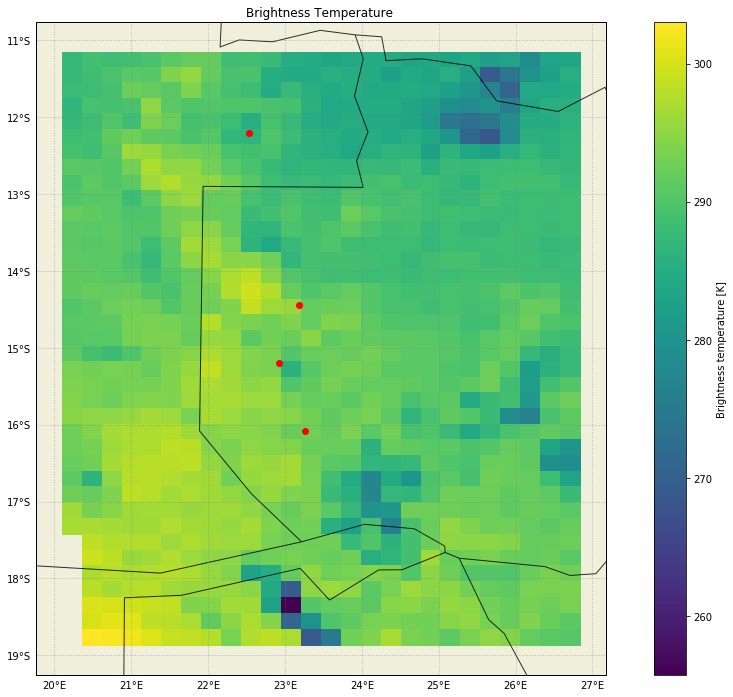

In [21]:


plt.figure(figsize=(17,12)) 
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.8)
ax.add_feature(cartopy.feature.LAKES)
xi, yi =np.meshgrid(ds.x, ds.y)

# the chosen projection is not (yet) supported by caropy.crs, so we need to do the transformation ourselves for now. 
# No biggy, here we go

loni, lati = pyproj.transform(proj_in, proj_out, xi, yi)
p = ax.pcolormesh(loni, lati, ds['TB'].values[1], transform=ccrs.PlateCarree())

    # also plot some points of interest 
ax = nsidc.plot_points(ax, points_interestSen, marker='o', color='r', linewidth=0., transform=ccrs.PlateCarree())
ax = nsidc.plot_points(ax, points_interestLuk, marker='o', color='r', linewidth=0., transform=ccrs.PlateCarree())
plt.colorbar(p, label='Brightness temperature [K]')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle=':')
plt.title('Brightness Temperature ')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Gracefully close ds
ds.close()
plt.savefig('/Users/oscarkeunen/Documents/1. TU Delft/1. Msc - Watermanagement/Afstuderen/Figures/Tb_map.png',dpi=400)


## Plotting CM-ratio  at Lukulu, No Discharge record @ Lukulu
plotting points upstream of at lukulu


/Users/oscarkeunen/opt/anaconda3/envs/afstuderen/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
<ipython-input-4-f54834e42fe6>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[n][df[n]<0] = df[n].fillna(method='bfill',inplace=True)


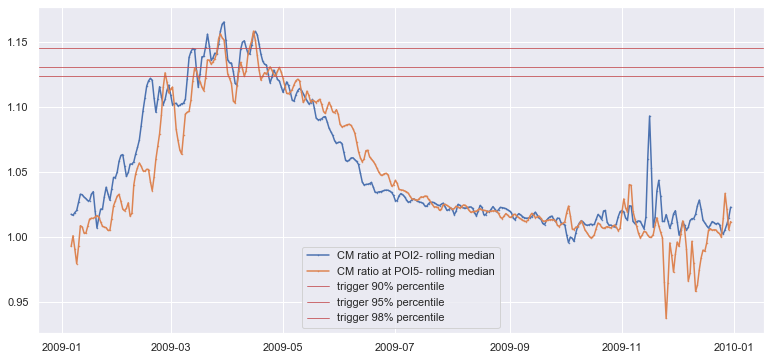

Timedelta('9 days 00:00:00')

In [4]:
# plotting the data at Lukulu

shift =0
import nsidc


plt.figure(figsize=(13,6))  
sns.set()

first_threshold_exceedance = {}

df = pd.DataFrame()


for n in [x for x in range(5) if x !=0 if x !=2 if x !=3]: 
    x, y  = points_xy[n]
    C, M, ratio,  = nsidc.c_m_ratio(ds['TB'], x, y)
    
    df[n] = ratio
    dates = ratio.time.values
    
    
    df[n].fillna(method='bfill',inplace=True)
    df[n][df[n]<0] = df[n].fillna(method='bfill',inplace=True)
    df[n] = df[n].rolling(6,center=False,win_type='bohman').mean() #.shift(10)  # apply and set the rolling median to 6

    df.index=dates
    trigger = df.quantile([0.9, 0.95, 0.98])
    

    
    df[1] =df[1].shift(shift)   
    
    plt.plot(df[n] ,marker='.', markersize=1,label= (f'CM ratio at POI{n+1}- rolling median'))
#     plt.axvline(rolling_median[rolling_median > 1.04])
    first_threshold_exceedance [n] = df[n][df[n] > 1.110].first_valid_index()
#     first_threshold_exceedance[n] = rolling_median.values > 1.04

df.index=dates
df.columns = ['POI1', 'POI4']
df.head()
        
plt.axhline(y=trigger[4][0.9],linewidth=0.8, color='r',label = 'trigger 90% percentile')
plt.axhline(y=trigger[4][0.95],linewidth=0.8, color='r',label = 'trigger 95% percentile')
plt.axhline(y=trigger[4][0.98],linewidth=0.8, color='r',label = 'trigger 98% percentile')
    
plt.ylabel="CM ratio [-]"
plt.xlabel=(f"Day in the year {year} ")
plt.title=(f"CM ratio in {year} ")

threshold_first_peak = first_threshold_exceedance[4]-first_threshold_exceedance[1]




plt.legend(loc='best')

# plt.axhline(y=1.05,linewidth=0.5, color='r')
# plt.axvline(x=70,linewidth=0.5, color='r')
#     plt.axvline(x=100,linewidth=0.5, color='r')
#     plt.axvline(x=110,linewidth=0.5, color='r')
#     plt.axvline(x=120,linewidth=0.5, color='r')
plt.grid(b=bool,which='major')


# plt.savefig((f'/Users/oscarkeunen/Documents/1. TU Delft/1. Msc - Watermanagement/Afstuderen/satellite-cookbook-master/NSIDC-AMSRE/figures_python/CM_POIs_25km{location}{year}_{shift}_.png'),dpi=400)
from statsmodels.tsa.seasonal import seasonal_decompose
plt.show()
threshold_first_peak

In [4]:
# df.to_excel("output.xlsx", sheet_name='SENANGA_DATA' )

## Plotting the Discharge timeseries 2009


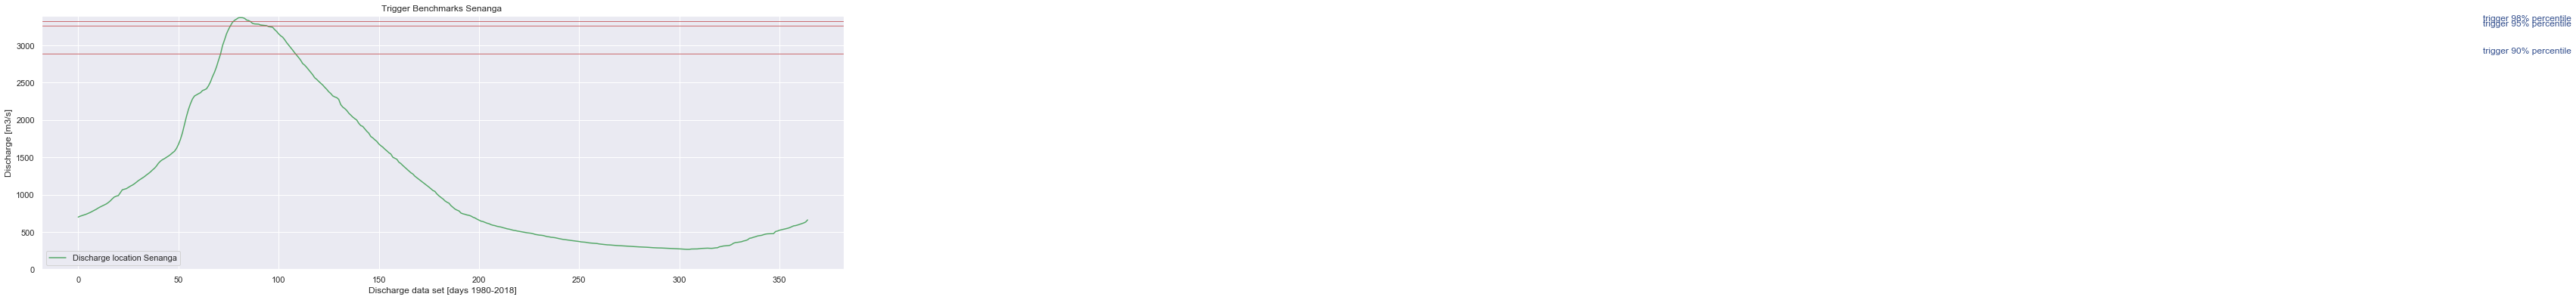

In [5]:
fig = plt.figure(figsize=(19,21))
sns.set()
ax1 = fig.add_subplot(311)

dQ= dQ[dQ.Date.dt.year==2009]



ax1.plot(dQ[f'{location}'].values,  color='g', label = (f'Discharge location {location}'))
ax1.legend()
ax1.set(xlabel=(f"Discharge data set [days 1980-2018]"),
       ylabel="Discharge [m3/s]",
       title=(f"Trigger Benchmarks {location} "),ylim =[0, 3400])
trigger = dQ[f'{location}'].quantile([0.9, 0.95, 0.98])
plt.axhline(y=trigger[0.90],linewidth=0.8, color='r',label = 'trigger 90% percentile')
ax1.text(1200, y=trigger[0.90], s='trigger 90% percentile', color='#334f8d')
ax1.text(1200, y=trigger[0.95], s='trigger 95% percentile', color='#334f8d')
ax1.text(1200, y=trigger[0.98], s='trigger 98% percentile', color='#334f8d')
plt.axhline(y=trigger[0.95],linewidth=0.8, color='r',label = 'trigger 90% percentile')
plt.axhline(y=trigger[0.98],linewidth=0.8, color='r',label = 'trigger 90% percentile')
# plt.savefig((f'/Users/oscarkeunen/Documents/1. TU Delft/1. Msc - Watermanagement/Afstuderen/satellite-cookbook-master/NSIDC-AMSRE/figures_python/Triggerbenchmark{location}.png'),dpi=400)
plt.show()

## Plotting the Discharge VS CM-ratio in the Barotse floodplain. Discharge @Senanga

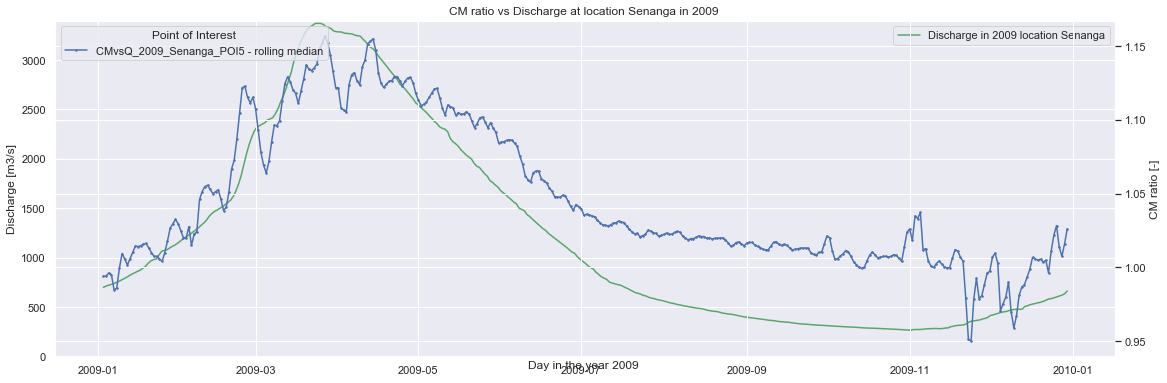

In [6]:
import nsidc
sns.set()
first_threshold_exceedance = {}
df = pd.DataFrame()
fig = plt.figure(figsize=(19,21))


for n in [x for x in range(5) if x !=0 if x !=1 if x !=2 if x !=3  if x !=5]: 
    x, y  = points_xy[n]
    C, M, ratio,  = nsidc.c_m_ratio(ds['TB'], x, y)
    
    df[n] = ratio
    df.index= ratio.time.values

    
    df[n].fillna(method='bfill',inplace=True)
    df[n][df[n]<0] = df[n].fillna(method='bfill',inplace=True)
    df[n] = df[n].rolling(3,center=False).mean() #.shift(10)  # apply and set the rolling mean of 5
    
    dQ.index =pd.DatetimeIndex(dQ.Date)
    
    trigger = df.quantile([0.9, 0.95, 0.98])
    
#     df[1] =df[1].shift(shift)        


    dQ= dQ[dQ.Date.dt.year>2002]
    dQ= dQ[dQ.Date.dt.year<2011]
#     dQ = dQ[dQ.Date.dt.month<5]
    
#-------------------- plot itttt ----------

#     meanQ =df_new['Q_Sen'].mean()
#

    

#     plt.plot(df[n] ,marker='.', markersize=1,label= (f'CM ratio at POI{n}- rolling median'))
ax1 = fig.add_subplot(311)
ax1.plot(dQ.Senanga.values, color='g', label = (f'Discharge in {year} location {location}'))
ax1.legend()
ax1.set(xlabel=(f"Day in the year {year} "),ylabel="Discharge [m3/s]",title=(f"CM ratio vs Discharge at location {location} in {year} "),ylim =[0, 3400]);
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

    
    
ax2 = fig.add_subplot(311, frameon=False)   # sharex=ax1,
ax2.plot(df ,marker='.', markersize=3, color='b', label = (f'CMvsQ_{year}_{location}_POI{n+1} - rolling median'))
ax2.set(ylabel="CM ratio [-]")
ax2.yaxis.set_label_position("right")
ax2.ylim =[-0.970, 1.020]
ax2.legend(loc=2, title ='Point of Interest',fancybox=True)
ax2.yaxis.tick_right()
    
    
    
#     plt.axvline(rolling_median[rolling_median > 1.04])
#     first_threshold_exceedance [n]= df[n][df[n] > 1.110].first_valid_index()
#     first_threshold_exceedance[n] = rolling_median.values > 1.04


df_new = df.join(dQ.Senanga)   #, left_index=True, right_index=True, how='inner')
# df_new = pd.concat([df.reindex(dQ.Senanga.index), dQ.Senanga],axis=1, join='inner')#reindex(df.index) .reindex(dQ.Senanga.index)
# df_new.set_index = dQ.Senanga.index
df_new.columns = [ 'POI4','Q_Sen']
# df_new.Q_Sen.fillna(meanQ, inplace=True)
# df_new.POI4.fillna(1, inplace=True)

    


# Create the plot of the cm ratio on second axis


    
#     plt.axvline(x=80,linewidth=0.5, color='r')
#     plt.axvline(x=90,linewidth=0.5, color='r')
#     plt.axvline(x=100,linewidth=0.5, color='r')
#     plt.axvline(x=110,linewidth=0.5, color='r')
#     plt.axvline(x=120,linewidth=0.5, color='r')
#     plt.grid(True)
    
    #plot triggers
    
#     ax1.axhline(y=trigger[0.90],linewidth=0.5, color='r')
#     ax1.axhline(y=trigger[0.95],linewidth=0.5, color='r')
#     ax1.axhline(y=trigger[0.98],linewidth=0.5, color='r')
#     ax1.text(-75, y=trigger[0.90], s='trigger 90% percentile', color='#334f8d')
#     ax1.text(-75, y=trigger[0.95], s='trigger 95% percentile', color='#334f8d')
#     ax1.text(-75, y=trigger[0.98], s='trigger 98% percentile', color='#334f8d')

    

# plt.legend(['POI 1', 'POI 2', 'POI 3', 'POI 4', 'POI 5', 'POI 6'],title ='Points of Interest',fancybox=True)


# plt.savefig((f'/Users/oscarkeunen/Documents/1. TU Delft/1. Msc - Watermanagement/Afstuderen/satellite-cookbook-master/NSIDC-AMSRE/figures_python/CMvsQ_{year}_{location}_POI{n+1}.png'),dpi=400)

In [11]:
df.index=dQ.index
# df= dQ[dQ.Date.dt.year<2011]

AttributeError: 'DataFrame' object has no attribute 'years'

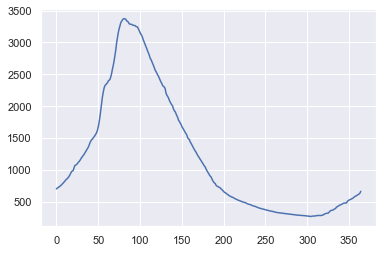

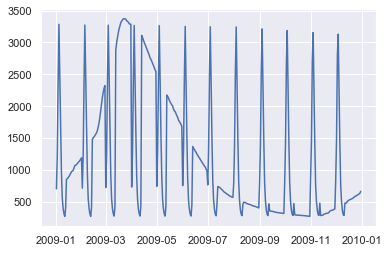

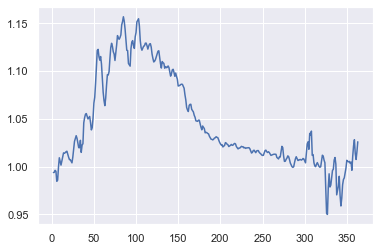

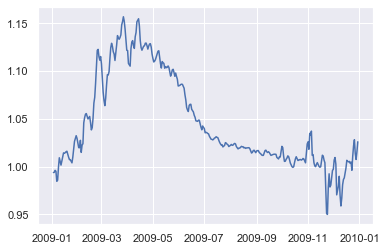

In [7]:
plt.figure()
plt.plot(dQ.Senanga.values)
plt.figure()
plt.plot(df_new.Q_Sen)
plt.figure()
plt.plot(df.values)
plt.figure()
plt.plot(df_new.POI4)

In [375]:
# df.index= ratio.time.values

# df_new = pd.concat([df.reindex(dQ.Senanga.index), dQ.Senanga] ,axis =1 )

# df_new = df_new[df_new.index.month<5]
# # print(df_new.to_string())

# plt.plot(df_new.Q_Sen.values,marker='.', markersize=1,label= (f'CM ratio at POI{n}- rolling median'))
del df_new

In [5]:
import nsidc
sns.set()
first_threshold_exceedance = {}
df = pd.DataFrame()
fig = plt.figure(figsize=(19,21))


for n in [x for x in range(2)]: 
    x, y  = points_xy[n]
    C, M, ratio,  = nsidc.c_m_ratio(ds['TB'], x, y)
    
    df[n] = ratio
    df.index= ratio.time.values
    

    
    df[n].fillna(method='bfill',inplace=True)
    df[n][df[n]<0] = df[n].fillna(method='bfill',inplace=True)
    df[n] = df[n].rolling(3,center=False).mean() #.shift(10)  # apply and set the rolling mean of 5
    
    dQ.index =pd.DatetimeIndex(dQ.Date)
    
    trigger = df.quantile([0.9, 0.95, 0.98])
    
#     df[1] =df[1].shift(shift)        


    dQ= dQ[dQ.Date.dt.year>2002]
    dQ= dQ[dQ.Date.dt.year<2011]
#     dQ = dQ[dQ.Date.dt.month<5]
    
#-------------------- plot itttt ----------

#     meanQ =df_new['Q_Sen'].mean()
#

    

#     plt.plot(df[n] ,marker='.', markersize=1,label= (f'CM ratio at POI{n}- rolling median'))
ax1 = fig.add_subplot(311)
ax1.plot(C.values,'go--',color='r', label = (f'Brightness temperature Calibration Cell'))
ax1.plot(M.values,'go--', color='b', label = (f'Brightness temperature Measurement Cell'))
ax1.legend(loc='best')
ax1.set(ylabel="Brightness Temperature [K]",title=(f"CM ratio vs Brightness temperatures at {location}  ")); #,ylim =[200, 400]
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

    
    
ax2 = fig.add_subplot(311, frameon=False)   # sharex=ax1,
ax2.plot(df[1] ,marker='.', markersize=3, color='g', label = (f'CM'))
ax2.set(ylabel="CM ratio [-]")
ax2.yaxis.set_label_position("right")
ax2.ylim =[-0.970, 1.020]
ax2.legend(loc=1, title ='Point of Interest',fancybox=True)
ax2.yaxis.tick_right()

fig.savefig((f'/Users/oscarkeunen/Documents/1. TU Delft/1. Msc - Watermanagement/Afstuderen/satellite-cookbook-master/NSIDC-AMSRE/figures_python/BrightnessCM.png'),dpi=300)


NameError: name 'points_xy' is not defined

<Figure size 1368x1512 with 0 Axes>

In [39]:
C.values


array([      nan, 288.69   , 287.99   , 287.63   , 290.81   ,       nan,
       271.65   ,       nan, 288.57   ,       nan, 281.29   , 288.69998,
             nan, 281.65   ,       nan, 281.07   ,       nan, 267.88   ,
       287.06   , 278.06   , 281.41   ,       nan, 277.53   ,       nan,
       284.75998,       nan, 287.19998, 285.49   ,       nan, 280.71   ,
             nan, 286.19   ,       nan, 282.     , 285.08   , 281.3    ,
       280.47998,       nan, 286.31   ,       nan, 284.88   ,       nan,
       286.54   , 284.38   ,       nan, 287.69   ,       nan, 286.13998,
             nan, 275.71   , 287.1    , 286.13998, 278.02   ,       nan,
       286.54   ,       nan, 287.44998,       nan, 284.22   , 283.93   ,
             nan, 287.07   ,       nan, 281.99   ,       nan, 283.49   ,
       286.58   , 283.13998, 286.63998,       nan, 285.88998,       nan,
       283.     ,       nan, 281.97998, 273.66   ,       nan, 284.22998,
             nan, 282.18   ,       nan, 283.4    , 

In [ ]:
def loadCM(points_xy, ds, rollingvalue):
    
    df = pd.DataFrame()
    
    for n in [x for x in range(5)]: 
        x, y  = points_xy[n]
        C, M, ratio,  = nsidc.c_m_ratio(ds['TB'], x, y)
    
        df[n] = ratio
        dates = ratio.time.values
        df.index=dates
    
        df[n].fillna(method='bfill',inplace=True)
        df[n][df[n]<0] = df[n].fillna(method='bfill',inplace=True)
        df[n] = df[n].rolling(rollingvalue,center=False).median()  # apply and set the rolling median to rollingvalue
    df.columns = ['POI1', 'POI4']
    df.POI1.fillna(1, inplace=True) #make sure to remove the NaN values because the QR function does not work with them. Replace with a value to make sure the offset is still correct
    df.POI4.fillna(1, inplace=True)
    
    return df 
    
def applyshift(df,rollingvalue,shift,plot):
    
    df['POI1']=df['POI1'].shift(shift)
    
    if plot == 1:
        
        fig, ax = plt.subplots(figsize=(15,5))
        sns.set()
        
        ax.plot(df,marker='.', markersize=1.2,label= (f'CM ratio at POI - rolling median of {rollingvalue}'))
        ax.set(xlabel='Years of ASMR-E dataset', ylabel='CM Ratio (-)',
           title=f' CM Ratio at the selected locations for Senanga given LT = {shift}')
        ax.legend()
        ax.tick_params(labelsize=12)
        ax.grid(b=bool)
        
#         trigger = df.quantile([0.9, 0.95, 0.98])

        
#         plt.axhline(y=trigger[0][0.9],linewidth=0.8, color='r',label = 'trigger 90% percentile')    
#         plt.axhline(y=trigger[][0.95],linewidth=0.8, color='r',label = 'trigger 95% percentile')
#         plt.axhline(y=trigger[2][0.98],linewidth=0.8, color='r',label = 'trigger 98% percentile')
    
    return df